# MFE Statistics Problem Set 4

### Problem 9 : Bayesian estimation
## Question a
We consider the Bayesian estimation of the parameter $\theta$ of a Poisson samble with a Gamma prior $\Gamma(3,1)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import gamma
from scipy.stats import poisson
import pandas as pd
import random


###### PDF of the prior distribution
$\theta \sim \Gamma(3,1) $ , we have then $\mathbb{E}(\theta) = \frac{3}{1} = 3$ and $\sigma(\theta) = \frac{\sqrt{3}}{1} = \sqrt{3}$

$\xi(\theta) = \frac{1}{2}\theta^2e^{-\theta}$ 

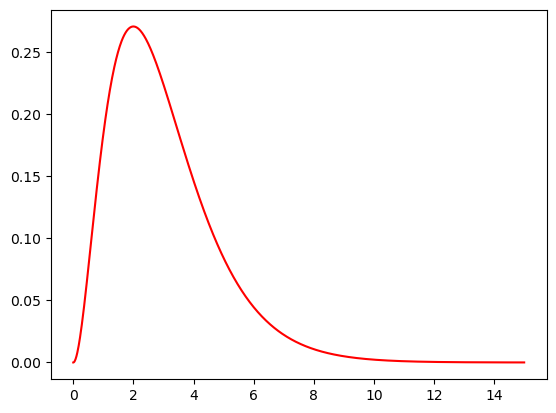

In [2]:
x = np.linspace(0,15,1000)
y = gamma.pdf(x , a=3 , scale = 1)
plt.plot(x,y,'r-', label='Gamma PDF')

## Question b
###### Poisson distribiution plot for $\theta \in$ { 3 - $\sqrt{3}$ , 3 , 3 + $\sqrt{3}$}

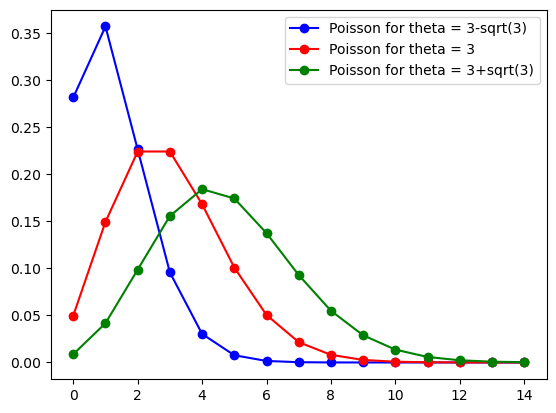

In [3]:
x_poisson = np.arange(15)
y_poisson_inf = poisson.pmf(x_poisson , 3-math.sqrt(3))
y_poisson_3 = poisson.pmf(x_poisson , 3)
y_poisson_sup = poisson.pmf(x_poisson , 3+math.sqrt(3))
 
plt.plot(x_poisson,y_poisson_inf,'bo', linestyle='-' , label = "Poisson for theta = 3-sqrt(3)" )
plt.plot(x_poisson,y_poisson_3,'ro', linestyle='-' , label = "Poisson for theta = 3" )
plt.plot(x_poisson,y_poisson_sup,'go', linestyle='-' , label = "Poisson for theta = 3+sqrt(3)" )
plt.legend()

## Question c & d
###### Sample data of size n = 500 (with $\theta = 2)

[3 4 4 1 3 3 1 0 4 1 2 1 4 1 1 2 1 1 2 1 2 0 2 3 1 0 2 2 1 2 0 4 2 2 0 1 0
 1 1 1 2 2 2 7 0 1 5 1 1 3 4 1 4 1 1 2 0 0 4 0 0 2 1 1 1 4 1 2 3 3 3 7 1 1
 1 3 1 4 2 2 2 4 1 1 3 2 1 0 0 0 1 1 3 7 1 2 1 1 1 1 2 1 3 2 2 0 1 1 2 2 0
 2 4 0 2 3 3 1 1 1 3 1 3 3 1 0 1 4 3 5 4 1 0 2 3 5 3 3 3 2 6 5 1 3 4 0 4 2
 2 2 3 2 2 2 0 5 4 4 1 2 1 1 1 2 4 3 1 1 0 3 4 2 3 0 3 1 3 4 0 5 1 3 2 2 1
 3 2 2 3 2 3 1 2 1 3 1 3 0 0 1 3 1 1 2 1 4 0 1 4 3 2 1 5 2 2 0 1 2 3 5 3 0
 3 0 0 2 1 0 2 5 4 2 2 1 2 2 0 5 2 3 3 1 3 4 4 2 2 1 1 4 1 0 3 3 1 1 2 2 3
 3 4 1 1 3 1 3 2 3 2 3 3 4 2 1 2 1 2 2 1 2 2 3 2 1 1 2 0 2 4 3 3 2 3 4 1 2
 1 2 3 0 0 2 2 0 3 0 6 2 2 2 1 5 1 2 2 3 1 4 2 3 1 0 0 2 2 0 3 1 2 2 2 1 2
 3 2 2 1 4 5 3 3 2 3 2 0 3 3 2 3 2 2 3 1 1 1 1 1 0 1 2 5 1 4 3 3 2 3 1 0 0
 1 2 2 4 6 3 2 4 1 2 3 2 2 2 1 0 2 3 4 2 2 2 4 2 4 5 3 2 2 1 2 2 3 4 2 2 0
 2 1 3 0 0 4 0 0 0 1 2 1 3 2 4 3 1 4 0 4 0 2 4 2 5 0 2 1 3 1 4 3 1 3 0 2 2
 2 2 0 3 3 2 2 1 3 1 1 2 1 6 5 3 1 1 0 1 5 5 5 1 2 2 4 5 2 1 2 0 4 5 1 1 3
 2 1 1 4 2 1 1 0 0 2 0 3 

(array([ 66.,   0., 130.,   0.,   0., 136.,   0.,   0.,  89.,   0.,   0.,
         51.,   0.,   0.,  21.,   0.,   0.,   4.,   0.,   3.]),
 array([0.  , 0.35, 0.7 , 1.05, 1.4 , 1.75, 2.1 , 2.45, 2.8 , 3.15, 3.5 ,
        3.85, 4.2 , 4.55, 4.9 , 5.25, 5.6 , 5.95, 6.3 , 6.65, 7.  ]),
 <BarContainer object of 20 artists>)

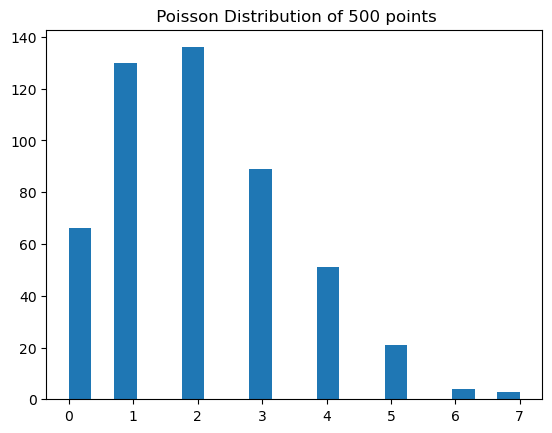

In [4]:
X_simul = poisson.rvs(mu=2 , size = 500)
print(X_simul)
plt.title(" Poisson Distribution of 500 points")
plt.hist(X_simul,bins=20)

##### Recall
In the lecture 5, we learn that if the prior of the parameter $\theta$ of a poisson observation X is $\Gamma(\alpha,\beta)$ , then: 

$$ \theta | X \sim \Gamma(\alpha + X , \beta + 1) $$

By induction, for a sample of n Poisson random variable, with $\alpha = 3$ and $\beta = 1$

$$ \theta | (X_i) \sim \Gamma(3 + \sum X_i , 1 + n) $$
$$ \mathbb{E}(\theta | (X_i)) = \frac{3 + \sum X_i}{1+n} $$ 
$$ Var(\theta | (X_i)) = \frac{3 + \sum X_i}{(1+n)^2} $$ 

We print the parameters of the posterior gamma distribution every 100 iterations. 
We now plot the mean and standard deviation of the posterior distribution.

In [5]:
x = np.arange(500)
mean = np.zeros(500)
variance = np.zeros(500)
mean[0] = 3
variance[0] = 3
print('the posterior distribution is Gamma(alpha,beta)')
for i in range(1,500):
    mean[i] = (mean[i-1]*i + X_simul[i])/(i+1)
    variance[i] = mean[i]/(i+1)
    if i%100 == 0:
        print('for i = %i' %i) 
        print('alpha = %f' %(mean[i]*mean[i]/variance[i]))        # = 3 + sum(X)
        print('beta = %f'%(1+i))
        print('\n')

the posterior distribution is Gamma(alpha,beta)
for i = 100
alpha = 186.000000
beta = 101.000000


for i = 200
alpha = 402.000000
beta = 201.000000


for i = 300
alpha = 609.000000
beta = 301.000000


for i = 400
alpha = 825.000000
beta = 401.000000




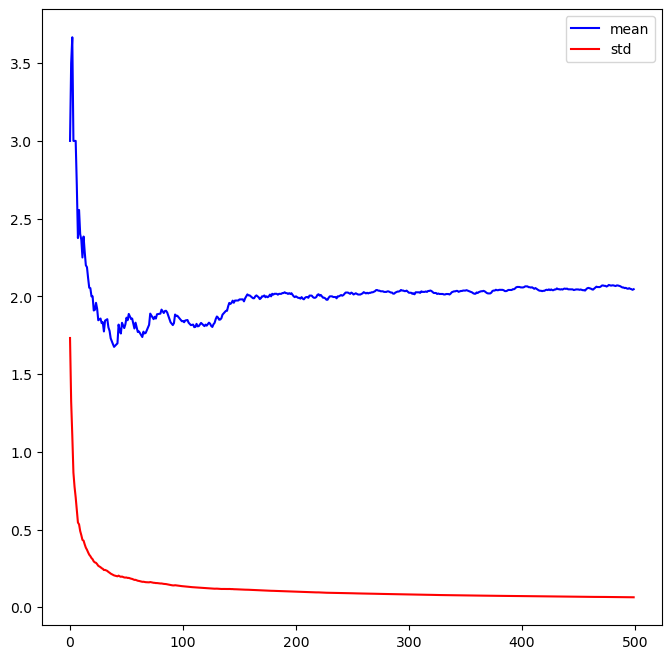

In [6]:
plt.figure(figsize=(8,8))
plt.plot(x , mean ,'b', linestyle='-' , label = "mean" )
plt.plot(x , np.sqrt(variance) , 'r', linestyle='-' , label = "std" )
plt.legend()

We see that the mean of the posterior distribution converges to the real value of $\theta$ : 2 

We can also see that the standard deviation of the posterior distribution decreases to 0 when the size of the sample get bigger. We will notice this behavior in the next plots. We plot the PDF of the posterior distribution vor various value of n (the size of the sample)


## Question e

/var/folders/5c/48bxbxvn6lx0_gqf44f0n31m0000gn/T/ipykernel_70815/636303761.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x,y,'b-', label='Posterior PDF for i = %i' %(i+1),color=colormap[i+1])


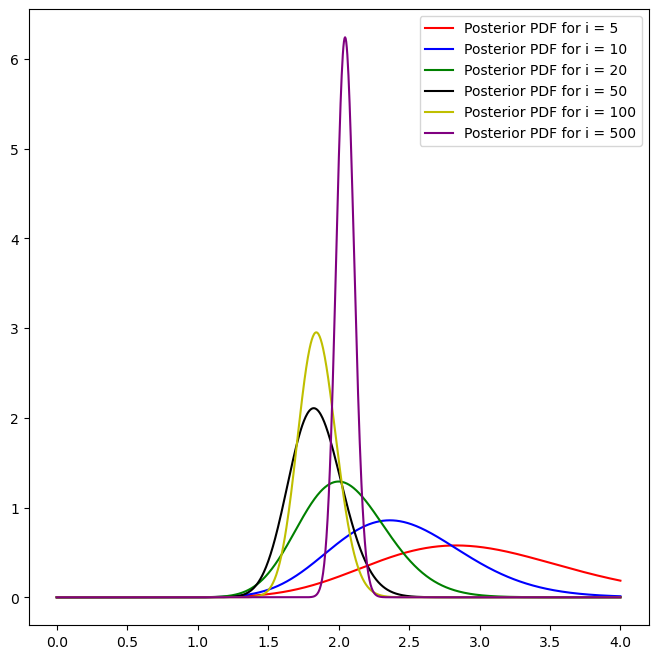

In [7]:
interval = np.array([5,10,20,50,100,500])
colormap = { 5 : 'r',10:'b',20:"g",50:"black",100:"y",500:"purple"}
alpha = 3 
fig, ax = plt.subplots(figsize=(8,8))
for i in range(500):
    alpha += X_simul[i]
    if (i+1) in interval:
        beta = 1 + (i+1)
        x = np.linspace(0 , 4 , 1000)
        y = gamma.pdf(x , a = alpha , scale = 1/beta)
        ax.plot(x,y,'b-', label='Posterior PDF for i = %i' %(i+1),color=colormap[i+1])
        ax.legend()

The bigger n is, the smaller the standard deviation get. For the final iteration at i = 500 , we obtain a PDF with a very low variance.

## Question f 
##### Bayes estimator


The Bayes estimator of $\theta$ with respect to the squared error loss function is given by,
$$ \hat{\theta}_n = \mathbb{E}(\theta|(X_i)_{i\leq{n}}) = \frac{3+\sum_{i=1}^n X_i}{1+n}  $$

Therefore, we take the previous plot with the mean of the posterior distributions to get the Bayes estimator. 
We also use the function gamma.interval to find the confidence interval $$ I_\alpha $$  of the bayesian estimator.
$$    \mathbb{P}(\theta|(X_i)_{i\leq{n}} \in I_\alpha ) = 1 - \alpha   $$ 




The difference between the two confidence interval boundaries for i = 50
0.7445042083576943
The difference between the two confidence interval boundaries for i = 100
0.5304859958112409
The difference between the two confidence interval boundaries for i = 150
0.4487550644715783
The difference between the two confidence interval boundaries for i = 200
0.3909311770875403
The difference between the two confidence interval boundaries for i = 250
0.35228035009915826
The difference between the two confidence interval boundaries for i = 300
0.32212546388235386
The difference between the two confidence interval boundaries for i = 350
0.2987956533478313
The difference between the two confidence interval boundaries for i = 400
0.28091673748082724
The difference between the two confidence interval boundaries for i = 450
0.2640347688425826
The difference between the two confidence interval boundaries for i = 500
0.25059760072977233


<Figure size 640x480 with 0 Axes>

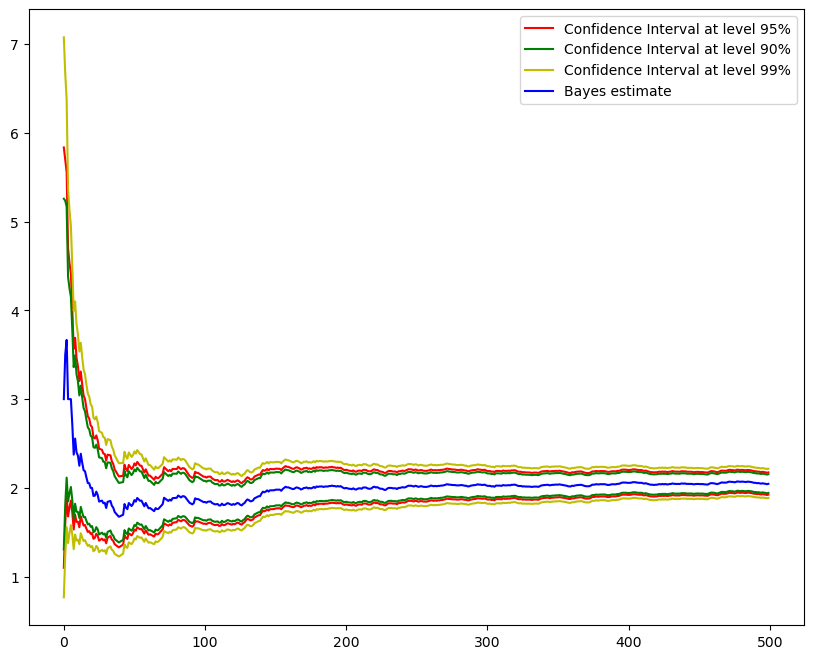

<Figure size 640x480 with 0 Axes>

In [8]:
x = np.arange(500)
IC_minus_90 = np.zeros(500)
IC_plus_90 = np.zeros(500)

IC_minus_95 = np.zeros(500)
IC_plus_95 = np.zeros(500)

IC_minus_99 = np.zeros(500)
IC_plus_99 = np.zeros(500)

diff_IC_Bayes = np.zeros(10)

alpha = 3
beta = 1
for i in range(500):
    beta+= 1
    alpha+= X_simul[i]    
    (IC_minus_90[i] , IC_plus_90[i]) = gamma.interval(0.90 , a = alpha , scale = 1/beta)
    (IC_minus_95[i] , IC_plus_95[i]) = gamma.interval(0.95 , a = alpha , scale = 1/beta)
    (IC_minus_99[i] , IC_plus_99[i]) = gamma.interval(0.99 , a = alpha , scale = 1/beta)
    if (i+1)%50 == 0:
        print('The difference between the two confidence interval boundaries for i = %i'%(i+1))
        print(IC_plus_95[i]-IC_minus_95[i])
plt.figure(figsize=(10,8))
plt.plot(x , IC_minus_95 , 'r', label = "Confidence Interval at level 95%" )
plt.plot(x , IC_plus_95 , 'r', )
plt.plot(x , IC_minus_90 , 'g', label = "Confidence Interval at level 90%" )
plt.plot(x , IC_plus_90 , 'g', )
plt.plot(x , IC_minus_99 , 'y', label = "Confidence Interval at level 99%" )
plt.plot(x , IC_plus_99 , 'y', )
plt.plot(x , mean ,'b', linestyle='-' , label = "Bayes estimate" )
plt.legend()
plt.figure()

With this last graphic, we can see that the probability that $\theta \in [1.8,2.15]$ is equal to 99%

## Question g 
##### Maximum likelihood estimator

The PDF of a Poisson random variable with the parameter $\theta$ is given as follows:
$$\forall x \in \mathbb{N}  \text{ }\textbf{ }\text{ }   f(x|\theta) = e^{-\theta}\frac{\theta^k}{k!}$$

Then, the likelihood function is

$$ L((x_i)|\theta) = e^{-n\theta} \frac{\theta^{\sum_{i}^nx_i}}{x_1!..x_n!} \text{ } \infty \text{ } e^{-n\theta} \theta^{\sum_{i}^nx_i} $$

Then we derive the log-likelihood function:

$$ l(x_i|\theta) = log(L(x_i|\theta)) \text{ } = -n\theta + \sum_{i}^nx_i log(\theta) + C $$ 

To find the value of theta which maximizes this function, we calculate its derivative:

$$ \frac{\partial l}{\partial \theta}(x_i|\theta) = -n + \frac{\sum_{i}^nx_i}{\theta}$$



Then we find that 
$$ \hat{\theta}_{MLE} = \frac{\sum_{i}^nx_i}{n} = \bar{X_n}$$



As in the first part, we want to see the behavior of this estimator, especially when the size n of the sample increases.

We now determine the standard deviation of this estimator:
$$ Var(\hat{\theta}_{MLE}) = \frac{N}{N^2} Var(X) = \frac{1}{N}\sqrt{\mathbb{E}(X)}$$

Therefore
$$ \hat{\sigma}(\hat{\theta}_{MLE}) = \frac{1}{\sqrt{N}}\sqrt{\bar{X_n}}$$


With the limit central theorem, we have:
$$ \sqrt{N} \frac{\hat{\theta}_{MLE}-\theta}{\hat{\sigma}(\hat{\theta}_{MLE})} \longrightarrow_{n\rightarrow \infty} N(0,1) $$


With the alpha-order quantile $q_\alpha$ we can determine the Confidence Interval of $\theta$

$$ \mathbb{P}\left[ \bar{X_n} - q_{1 - \frac{\alpha}{2}}\sqrt{\frac{ \bar{X_n}}{N}} ;  \bar{X_n} + q_{1 - \frac{\alpha}{2}}\sqrt{\frac{ \bar{X_n}}{N}}\right] = \alpha $$

## Question h

The difference between the two confidence interval boundaries for i = 50
0.7478883339108855
The difference between the two confidence interval boundaries for i = 100
0.5317346706770212
The difference between the two confidence interval boundaries for i = 150
0.44961486729076117
The difference between the two confidence interval boundaries for i = 200
0.3915096933665885
The difference between the two confidence interval boundaries for i = 250
0.35271287813177477
The difference between the two confidence interval boundaries for i = 300
0.32245822468448004
The difference between the two confidence interval boundaries for i = 350
0.29906307027113854
The difference between the two confidence interval boundaries for i = 400
0.2811421704405088
The difference between the two confidence interval boundaries for i = 450
0.26422108213939643
The difference between the two confidence interval boundaries for i = 500
0.2507574700781614


<Figure size 640x480 with 0 Axes>

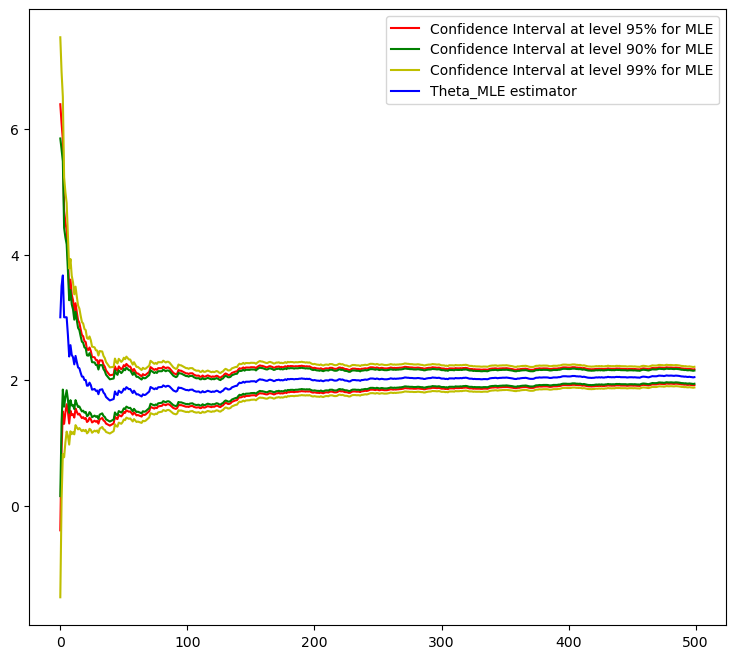

<Figure size 640x480 with 0 Axes>

In [9]:
x = np.arange(500)
X_average = 0
theta_MLE = np.zeros(500)
IC_min_90 = np.zeros(500)
IC_p_90 = np.zeros(500)
IC_min_95 = np.zeros(500)
IC_p_95 = np.zeros(500)
IC_min_99 = np.zeros(500)
IC_p_99 = np.zeros(500)
difference_boundaries = np.zeros(10)
for i in range(500):
    X_average = (X_average*i + X_simul[i])/(i+1)
    theta_MLE[i] = X_average
    IC_min_90[i] = X_average - 1.645*math.sqrt(X_average/(i+1)) 
    IC_p_90[i] = X_average + 1.645*math.sqrt(X_average/(i+1)) 
    IC_min_95[i] = X_average - 1.960*math.sqrt(X_average/(i+1)) 
    IC_p_95[i] = X_average + 1.960*math.sqrt(X_average/(i+1)) 
    IC_min_99[i] = X_average - 2.576*math.sqrt(X_average/(i+1)) 
    IC_p_99[i] = X_average + 2.576*math.sqrt(X_average/(i+1)) 
    if (i+1)%50 == 0:
        print('The difference between the two confidence interval boundaries for i = %i'%(i+1))
        print(IC_p_95[i]-IC_min_95[i])
plt.figure(figsize=(9,8))       
plt.plot(x , IC_min_95 , 'r', label = "Confidence Interval at level 95% for MLE" )
plt.plot(x , IC_p_95 , 'r', )
plt.plot(x , IC_min_90 , 'g', label = "Confidence Interval at level 90% for MLE" )
plt.plot(x , IC_p_90 , 'g', )
plt.plot(x , IC_min_99 , 'y', label = "Confidence Interval at level 99% for MLE" )
plt.plot(x , IC_p_99 , 'y', )
plt.plot(x , theta_MLE ,'b', linestyle='-' , label = "Theta_MLE estimator" )
plt.legend()
plt.figure()

First, we can see that for both estimator, the right value of $\theta$ = 2 is always in all confidence interval.
At first sight, we could say that the two estimators are quite similar, with approximately the same behavior when the size n of the sample is large.
To check this consideration, we plot the the Confidence Interval at level 95% for the 2 estimators.

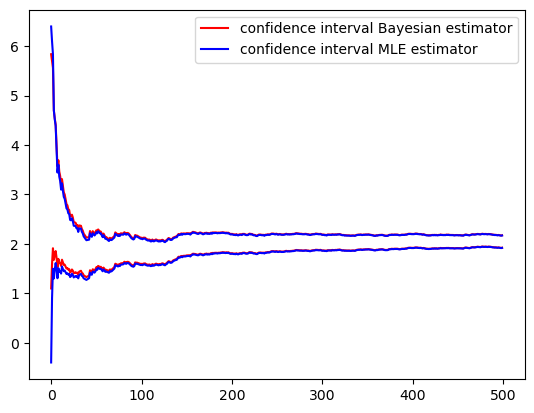

In [10]:
plt.plot(x,IC_plus_95 ,"r")
plt.plot(x,IC_minus_95 ,"r" , label = 'confidence interval Bayesian estimator')
plt.plot(x,IC_p_95 , "b")
plt.plot(x,IC_min_95 , "b" , label = 'confidence interval MLE estimator')
plt.legend()

We effectively observe that when the size of the sample increases, the two confidence interval are almost mingled. This seems logical: if you take the same sample for the two estimation of $\theta$:
$$ \hat{\theta}_{Bayes} - \hat{\theta}_{MLE} = \frac{3+\sum_{i=1}^n X_i}{1+n} - \frac{\sum_{i=1}^n X_i}{n} =_{n\rightarrow +\infty} O\left(\frac{1}{n}\right) $$